# AnomalyGuard: Anomaly Detection Solution for Financial Institutions

AnomalyGuard is an innovative anomaly detection model specifically designed for financial institutions to enhance their fraud detection capabilities. Built upon the powerful Isolation Forest algorithm, AnomalyGuard provides a comprehensive solution for identifying anomalies in credit card balance datasets, enabling real-time detection of suspicious activities and potential fraud attempts.

Such unsupervised learning method eliminates the need for labeled data, making it adaptable to evolving fraud patterns. By continuously learning from the dataset's normal behavior, AnomalyGuard can effectively flag even previously unseen anomalies, keeping financial institutions ahead of emerging fraud techniques.

The primary purpose of AnomalyGuard is to enable financial institutions to detect and prevent fraudulent activities effectively.
* By leveraging its real-time insights, banks can take immediate action to prevent unauthorized access to customer accounts and mitigate potential financial losses.
* Early detection not only protects the institution but also safeguards the financial well-being of customers, ensuring their trust remains intact.
* AnomalyGuard alsooffers substantial cost-saving benefits. By identifying anomalies early on, financial institutions can minimize the impact of fraud, reducing the resources required for investigating and resolving fraud cases. This optimization of operational costs contributes to the overall efficiency and profitability of the institution.

All in all, **AnomalyGuard** is a comprehensive anomaly detection solution that empowers financial institutions to stay ahead of fraudsters. By leveraging its advanced capabilities, institutions can fortify their fraud detection strategies, protect their customers, and enhance their overall security. AnomalyGuard's adaptability, precision, and cost-saving potential make it an indispensable tool for any financial institution aiming to strengthen their fraud prevention efforts.


![Image Description](https://images.pexels.com/photos/7567443/pexels-photo-7567443.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)


* Why IsolationForest?

Isolation Forest is a particularly suitable model for anomaly detection in credit card balance datasets for several reasons:

Efficiency: Isolation Forest has a fast execution time compared to other anomaly detection algorithms. It constructs a random forest-based structure to isolate anomalies efficiently, making it well-suited for large datasets with millions of records. Its efficiency allows for real-time or near real-time detection, which is crucial for identifying and responding to fraudulent activities promptly.

Unsupervised Learning: Isolation Forest is an unsupervised learning algorithm, meaning it does not require labeled data for training. In the context of anomaly detection for credit card balance datasets, this is advantageous as anomalies may not always be explicitly labeled. Isolation Forest learns the normal behavior of the dataset and identifies instances that deviate significantly from the norm as potential anomalies, making it adaptable to evolving fraud patterns.

While other anomaly detection algorithms, such as clustering-based approaches or density-based methods, have their strengths, Isolation Forest offers a combination of efficiency, scalability, adaptability to high-dimensional data, and resistance to overfitting that make it well-suited for detecting anomalies in credit card balance datasets. Its ability to identify global anomalies and operate in an unsupervised manner further enhances its suitability for fraud detection in financial institutions.

## Exploratory data analysis (EDA)

In [1]:
""" Importing modules """
import pandas as pd
import warnings
import pickle
import helpers

from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")

First, I start with reading the dataset credit_card_balance.csv which will be used for creating the IsolationForest model

In [2]:
""" Reading the credit card balance dataset """
df_cc = pd.read_csv("home_credit_risk/credit_card_balance.csv")
df_cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [3]:
""" Reading descriptions dataset """
descriptions = pd.read_csv(
    "home_credit_risk/HomeCredit_columns_description.csv", encoding="ISO-8859-1"
)

In [40]:
descriptions[descriptions.Row == "TARGET"].iloc[0].Description

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

Now, I check for duplicate values in the dataset and we can see that there were no duplicate values

In [4]:
""" Dropping duplicate values if any """
df_cc = helpers.drop_duplicates_from_df(df_cc)

No duplicates found.


In [5]:
""" Looking for missing values """
missing_cols = [col for col, val in df_cc.isnull().sum().items() if val != 0]

We can see that there are some missing columns not at random. Therefore, I will investigate what is the case.

AMT_DRAWINGS_ATM_CURRENT column missing values percentage - 19.52487194%
AMT_DRAWINGS_OTHER_CURRENT column missing values percentage - 19.52487194%
AMT_DRAWINGS_POS_CURRENT column missing values percentage - 19.52487194%
AMT_INST_MIN_REGULARITY column missing values percentage - 7.94820837%
AMT_PAYMENT_CURRENT column missing values percentage - 19.99806266%
CNT_DRAWINGS_ATM_CURRENT column missing values percentage - 19.52487194%
CNT_DRAWINGS_OTHER_CURRENT column missing values percentage - 19.52487194%
CNT_DRAWINGS_POS_CURRENT column missing values percentage - 19.52487194%
CNT_INSTALMENT_MATURE_CUM column missing values percentage - 7.94820837%


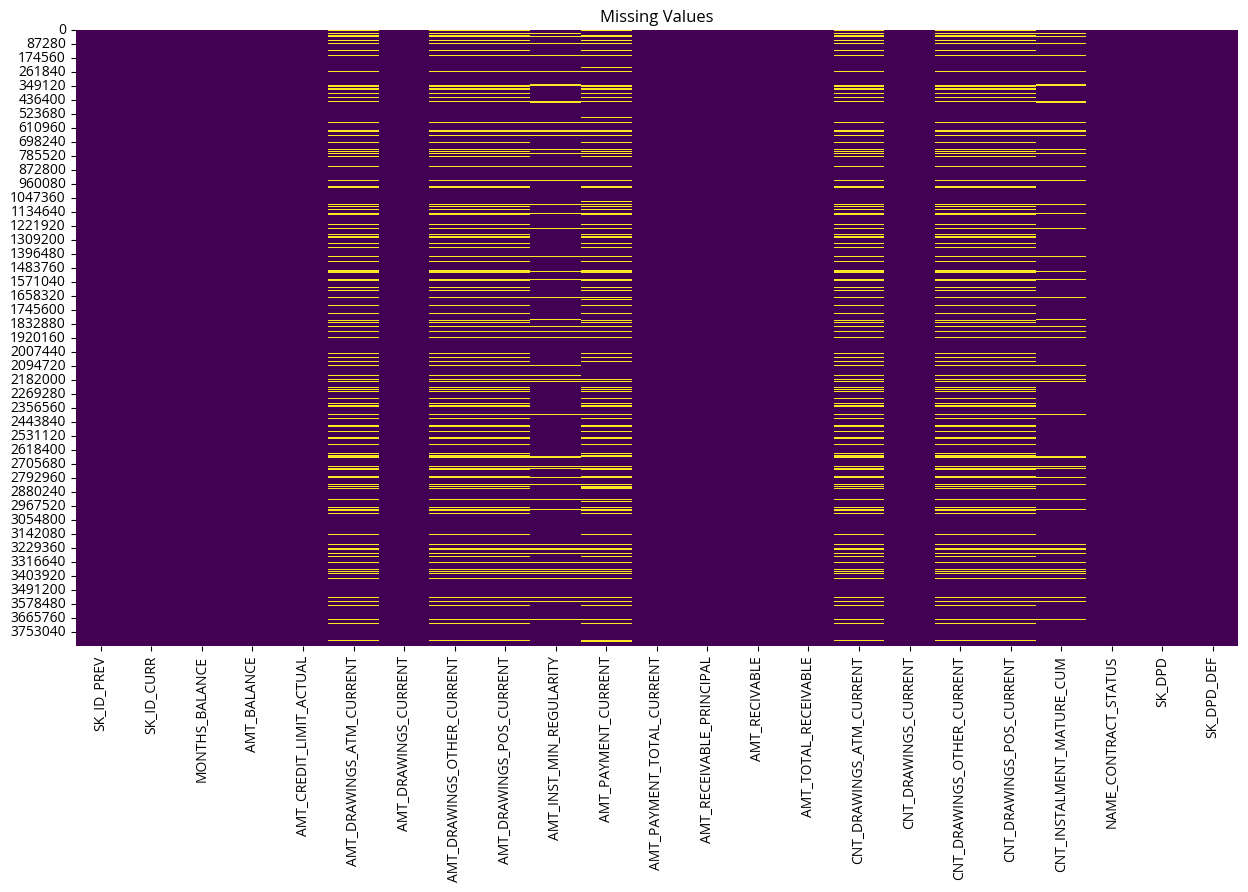

In [6]:
""" Plotting missing values and printing percentages """
helpers.plot_missing_vals(df_cc, missing_cols)

In [7]:
""" Dropping columns that have all columns missing """
df_cc.dropna(subset=missing_cols, how="all", inplace=True)
new_df_cc_len = len(df_cc)

I thought that maybe there are some columns that are missing at the same time. For instance AMT_DRAWINGS_ATM_CURRENT and CNT_DRAWINGS_ATM_CURRENT seems logical to be missing together because one is the count of ATM withdrawals and the other is the amount. Therefore, I will impute by zero if both are missing. 

* AMT_DRAWINGS_ATM_CURRENT: This column represents the amount of money withdrawn at ATM machines.
* CNT_DRAWINGS_ATM_CURRENT: This column represents the count of ATM withdrawals.

In [8]:
""" Creating list where I will store those missing columns"""
cols_impute_by_zero = []

We can see that if CNT_DRAWINGS_ATM_CURRENT is missing then AMT_DRAWINGS_ATM_CURRENT is as well.

In [9]:
""" Printing missing values of AMT_DRAWINGS_ATM_CURRENT and CNT_DRAWINGS_ATM_CURRENT"""
print(df_cc[df_cc.AMT_DRAWINGS_ATM_CURRENT.isna()].CNT_DRAWINGS_ATM_CURRENT.unique())
print(df_cc[df_cc.CNT_DRAWINGS_ATM_CURRENT.isna()].AMT_DRAWINGS_ATM_CURRENT.unique())
cols_impute_by_zero.extend(["AMT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_ATM_CURRENT"])

[nan]
[nan]


We can see same pattern with AMT_DRAWINGS_OTHER_CURRENT and CNT_DRAWINGS_OTHER_CURRENT 
* AMT_DRAWINGS_OTHER_CURRENT: This column represents the amount of money withdrawn for purposes other than ATM withdrawals.
* CNT_DRAWINGS_OTHER_CURRENT: This column represents the count of non-ATM withdrawals. 

In [10]:
""" Printing missing values of AMT_DRAWINGS_OTHER_CURRENT and CNT_DRAWINGS_OTHER_CURRENT """
print(
    df_cc[df_cc.AMT_DRAWINGS_OTHER_CURRENT.isna()].CNT_DRAWINGS_OTHER_CURRENT.unique()
)
print(
    df_cc[df_cc.CNT_DRAWINGS_OTHER_CURRENT.isna()].AMT_DRAWINGS_OTHER_CURRENT.unique()
)
cols_impute_by_zero.extend(["AMT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT"])

[nan]
[nan]


Same thing for AMT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_POS_CURRENT
* AMT_DRAWINGS_POS_CURRENT: This column represents the amount of money withdrawn at points of sale. 
* CNT_DRAWINGS_POS_CURRENT: This column represents the count of withdrawals at points of sale. 

In [11]:
""" Printing missing values of AMT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_POS_CURRENT """
print(df_cc[df_cc.AMT_DRAWINGS_POS_CURRENT.isna()].CNT_DRAWINGS_POS_CURRENT.unique())
print(df_cc[df_cc.CNT_DRAWINGS_POS_CURRENT.isna()].AMT_DRAWINGS_POS_CURRENT.unique())
cols_impute_by_zero.extend(["AMT_DRAWINGS_POS_CURRENT", "CNT_DRAWINGS_POS_CURRENT"])

[nan]
[nan]


In [12]:
""" Printing missing values of AMT_INST_MIN_REGULARITY and CNT_INSTALMENT_MATURE_CUM """
print(df_cc[df_cc.AMT_INST_MIN_REGULARITY.isna()].CNT_INSTALMENT_MATURE_CUM.unique())
print(df_cc[df_cc.CNT_INSTALMENT_MATURE_CUM.isna()].AMT_INST_MIN_REGULARITY.unique())
cols_impute_by_zero.extend(["AMT_INST_MIN_REGULARITY", "CNT_INSTALMENT_MATURE_CUM"])

[nan]
[nan]


Therefore, I will impute all these columns with 0

In [13]:
""" Those columns with zero """
df_cleaned = df_cc.copy()
imputer = SimpleImputer(strategy="constant", fill_value=0)
df_cleaned[cols_impute_by_zero] = imputer.fit_transform(df_cleaned[cols_impute_by_zero])
df_cc = df_cleaned.copy()

AMT_DRAWINGS_ATM_CURRENT column missing values percentage - 0.0%
AMT_DRAWINGS_OTHER_CURRENT column missing values percentage - 14.08656849%
AMT_DRAWINGS_POS_CURRENT column missing values percentage - 0.0%
AMT_INST_MIN_REGULARITY column missing values percentage - 0.0%
AMT_PAYMENT_CURRENT column missing values percentage - 14.59173623%
CNT_DRAWINGS_ATM_CURRENT column missing values percentage - 0.0%
CNT_DRAWINGS_OTHER_CURRENT column missing values percentage - 0.0%
CNT_DRAWINGS_POS_CURRENT column missing values percentage - 0.0%
CNT_INSTALMENT_MATURE_CUM column missing values percentage - 0.0%


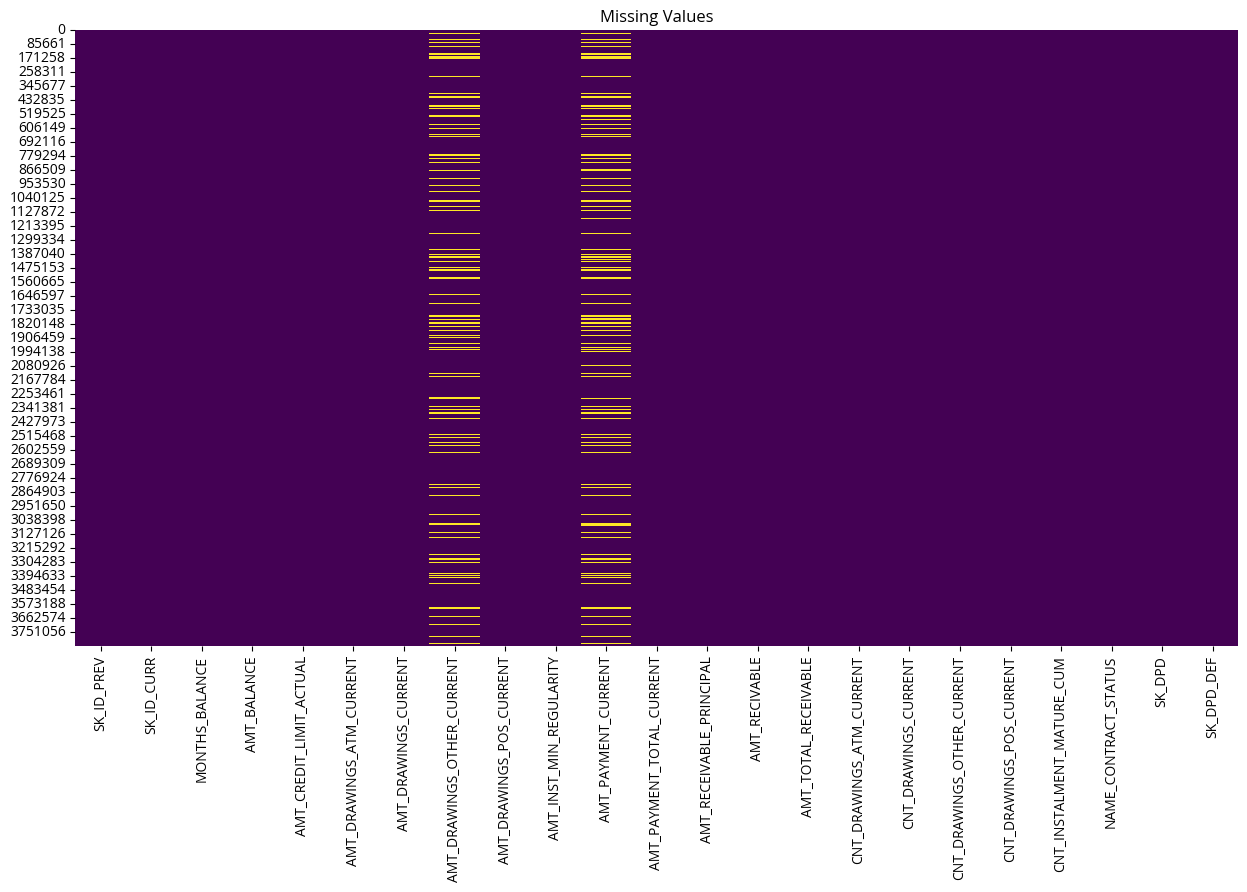

In [14]:
""" Plotting missing values and printing percentages """
helpers.plot_missing_vals(df_cc, missing_cols)

First, I wanted to examine the values present in the dataset for credit card balances.

### Balance Distribution:
Kernel density plot of the "AMT_BALANCE" column to visualize the distribution of credit card balances.

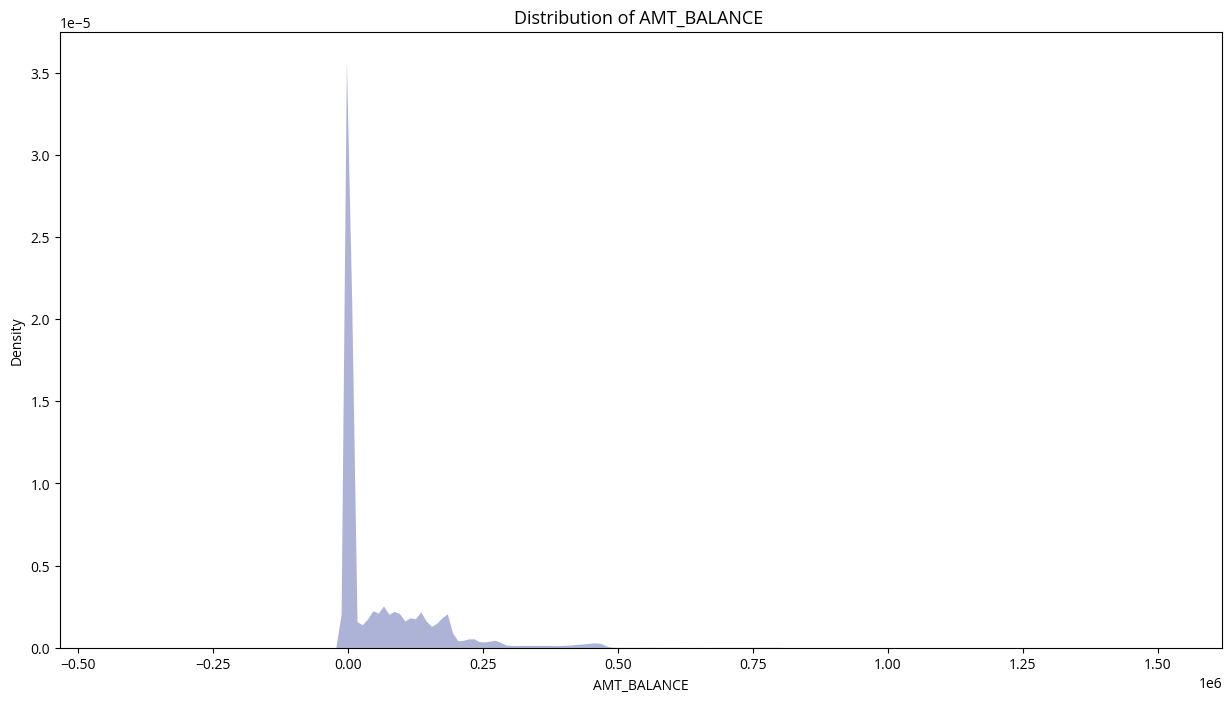

In [15]:
""" Plotting kde plot for AMT_BALANCE """
helpers.plot_kde(df_cc, "AMT_BALANCE")

### Monthly Payment Distribution
Below we can see density plot of the "AMT_PAYMENT_CURRENT" column to visualize the distribution of monthly payment amounts.

The column "AMT_PAYMENT_CURRENT" represents current payment amounts. Here's a summary of the statistics for this column:

* Mean: $10,280.54 (average payment amount)
* Median: Not available (missing or non-numeric values)
* Maximum: $4,289,207.45 (highest payment amount)
* Quantiles:
    * 25% quantile: $152.37 (25% of payments are equal to or below this value)
    * 50% quantile: $2,702.70 (50% of payments are equal to or below this value)
    * 75% quantile: $9,000.00 (75% of payments are equal to or below this value)

Mean: 10280.537702
Median: nan
Maximum: 4289207.445000
Quantiles:
  25% quantile: 152.370000
  50% quantile: 2702.700000
  75% quantile: 9000.000000


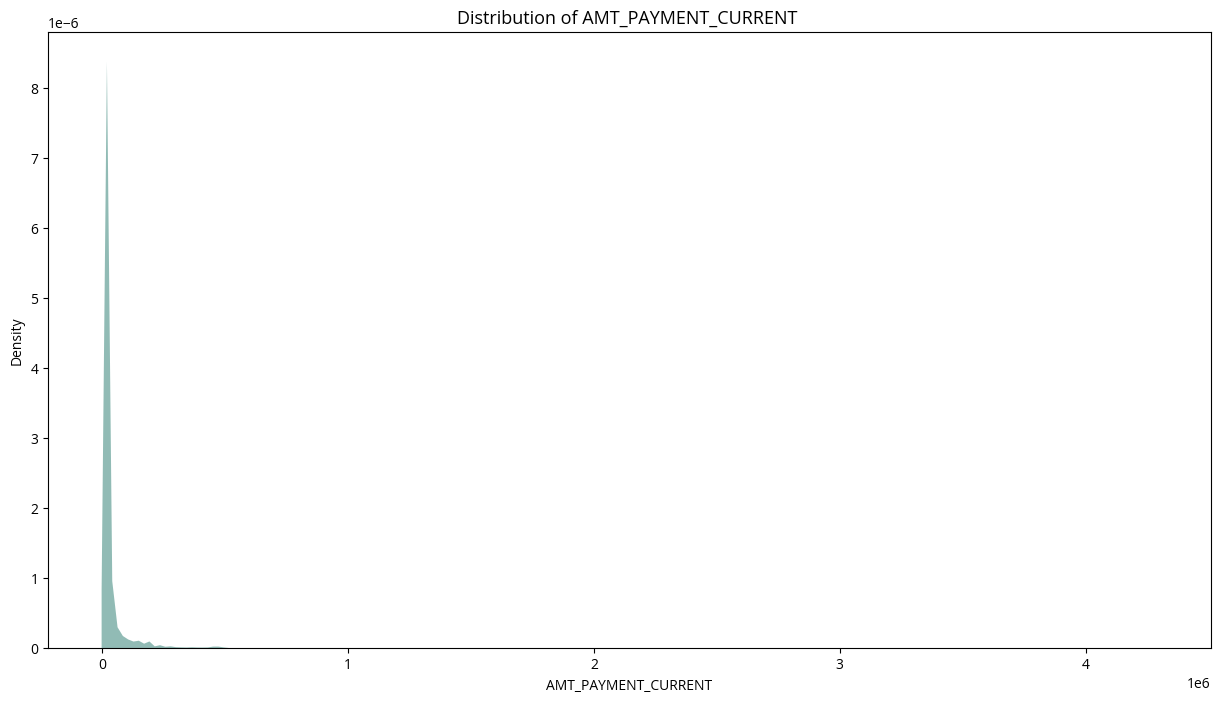

In [16]:
""" Plotting kde plot for AMT_PAYMENT_CURRENT """
helpers.calculate_statistics(df_cc, "AMT_PAYMENT_CURRENT")
helpers.plot_kde(df_cc, "AMT_PAYMENT_CURRENT")

### Utilization Rate
Below we can see kernel density plot of the "AMT_BALANCE" divided by the "AMT_CREDIT_LIMIT_ACTUAL" column to visualize the distribution of credit card utilization rates.

Credit card utilization rate refers to the percentage of available credit that a borrower is currently using. It is a measure of how much of the credit limit on a credit card has been utilized by the cardholder. Utilization rate is an important factor in assessing an individual's creditworthiness and financial health.

**Utilization Rate = (Outstanding Balance / Credit Limit) * 100**

In [17]:
""" Create new feature UTILIZATION_RATE """
df_plot = df_cc.copy()
df_plot["UTILIZATION_RATE"] = df_plot["AMT_BALANCE"] / df_plot[
    "AMT_CREDIT_LIMIT_ACTUAL"
].replace(0, 1)
df_plot["UTILIZATION_RATE"] = df_plot["UTILIZATION_RATE"].fillna(0)

* Mean: The average utilization rate in the "UTILIZATION_RATE" column is 5.41%. This value represents the average percentage of the credit limit that is currently being utilized across the dataset.
* Median: The median utilization rate for this column is 0.00%. It indicates that half of the entries in the dataset have a utilization rate of 0.00%, implying either zero outstanding balance or an unused credit limit.
* Maximum: The highest utilization rate in the "UTILIZATION_RATE" column is 1139278.41%. This value represents an exceptionally high utilization rate, potentially indicating a data anomaly or error.
* Quantiles: The quantiles provide additional insights into the distribution of the utilization rates:
    * 25% quantile: The value at the 25th percentile is 0.00%. This means that 25% of the utilization ratesin the dataset are equal to or below 0.00%.
    * 50% quantile: The value at the 50th percentile (median) is 0.00%. It indicates that half of the utilization rates are 0.00% or lower.
    * 75% quantile: The value at the 75th percentile is 0.80%. This means that 75% of the utilization rates in the dataset are equal to or below 0.80%.

Mean: 5.413652
Median: 0.000000
Maximum: 1139278.410000
Quantiles:
  25% quantile: 0.000000
  50% quantile: 0.000000
  75% quantile: 0.797585


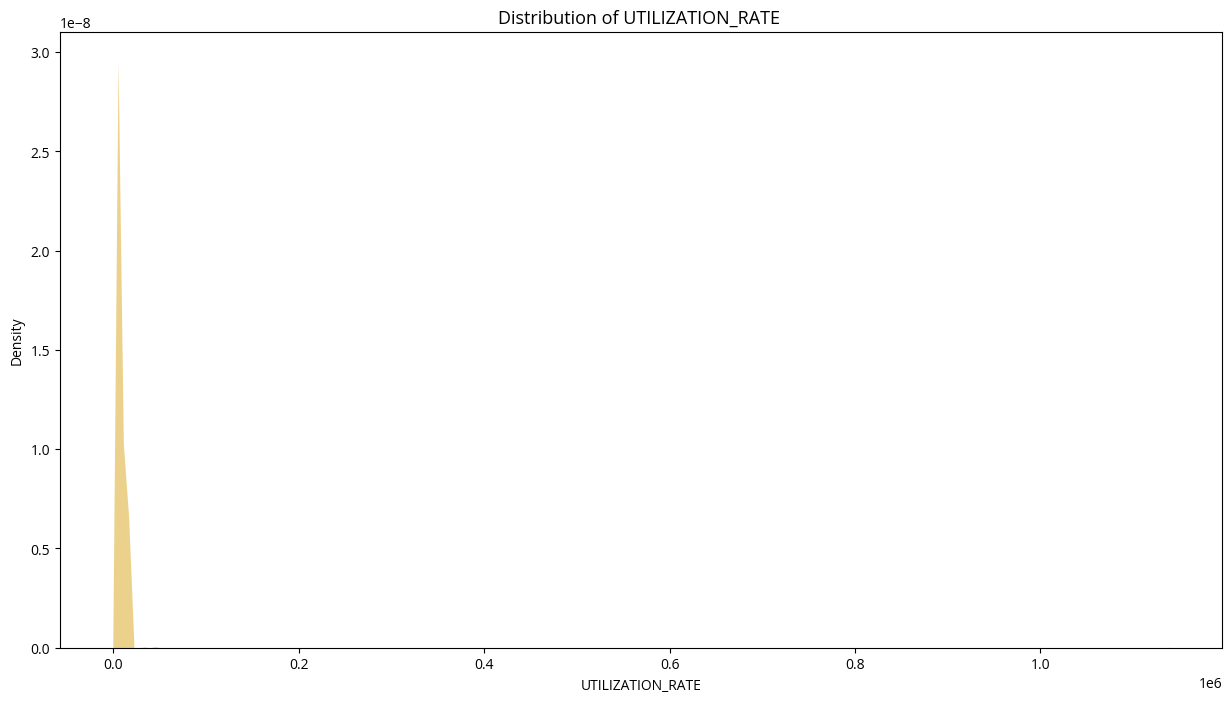

In [18]:
""" Plotting kde plot for UTILIZATION_RATE """
helpers.calculate_statistics(df_plot, "UTILIZATION_RATE")
helpers.plot_kde(df_plot, "UTILIZATION_RATE")

### Payment Delinquency

Histogram plot of the "SK_DPD" column to visualize the number of days past due for payments.

SK_DPD stands for "Système de Surveillance" Delinquency (Payment) Days. It represents the number of days that a borrower is past due on their credit card payment. The column contains integer values that indicate the payment delinquency status for each observation in the dataset.

A higher value in the SK_DPD column suggests a longer period of delinquency, indicating that the borrower has not made the required payment within the specified time frame. A value of 0 typically indicates that the payment is not delinquent, meaning the borrower has made the payment on time.

Mean: 9.911034
Median: 0.000000
Maximum: 3260.000000
Quantiles:
  25% quantile: 0.000000
  50% quantile: 0.000000
  75% quantile: 0.000000


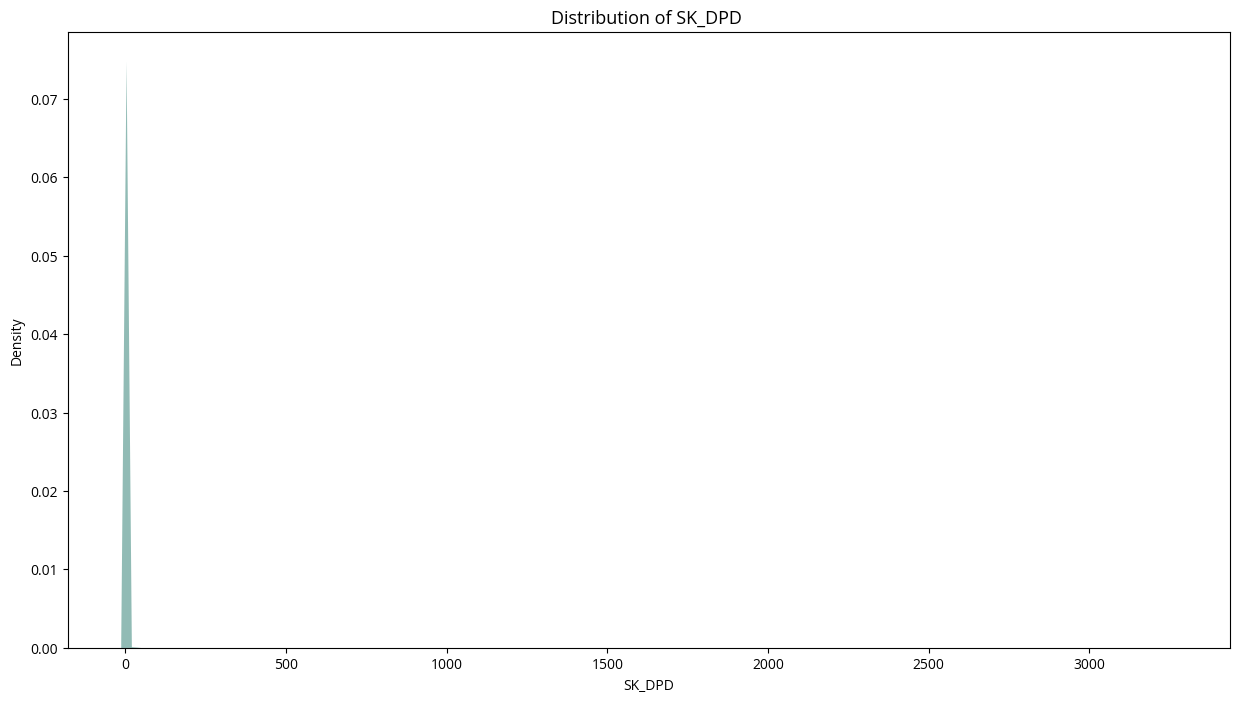

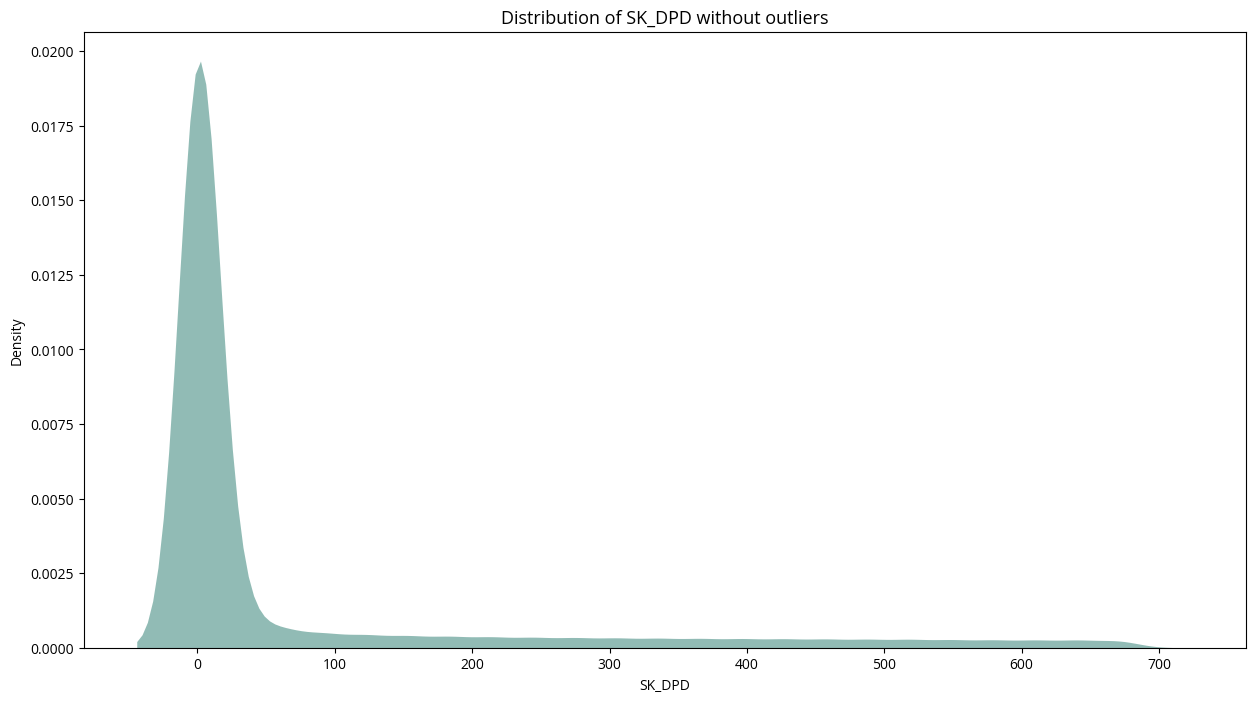

In [19]:
""" Plotting kde plot for SK_DPD """
helpers.calculate_statistics(df_cc, "SK_DPD")
helpers.plot_kde(df_cc, "SK_DPD")
helpers.plot_kde(df_cc[df_cc.SK_DPD != 0], "SK_DPD", without_outliers=True)

### Credit Limit

Below you san see KDE of the "AMT_CREDIT_LIMIT_ACTUAL" column to visualize the distribution of credit limits.

The column "AMT_CREDIT_LIMIT_ACTUAL" represents the actual credit limits assigned to individuals. Here's a description of the statistics for this column:

* Mean: The average credit limit in the "AMT_CREDIT_LIMIT_ACTUAL" column is approximately $156,826.58. This value represents the average amount of credit extended to individuals in the dataset.

* Median: The median credit limit for this column is $135,000.00. It indicates that half of the individuals in the dataset have a credit limit equal to or below this value.

* Maximum: The highest credit limit in the "AMT_CREDIT_LIMIT_ACTUAL" column is $1,350,000.00. This value represents the maximum credit limit assigned to an individual within the dataset.

* Quantiles: The quantiles provide further insights into the distribution of credit limits:
    * 25% quantile: The value at the 25th percentile is $45,000.00. This means that 25% of the individuals in the dataset have a credit limit equal to or below this value.

    * 50% quantile: The value at the 50th percentile (median) is $135,000.00. It indicates that half of the individuals have a credit limit equal to or below this value.

    * 75% quantile: The value at the 75th percentile is $180,000.00. This means that 75% of the individuals in the dataset have a credit limit equal to or below this value.



Mean: 156826.575153
Median: 135000.000000
Maximum: 1350000.000000
Quantiles:
  25% quantile: 45000.000000
  50% quantile: 135000.000000
  75% quantile: 180000.000000


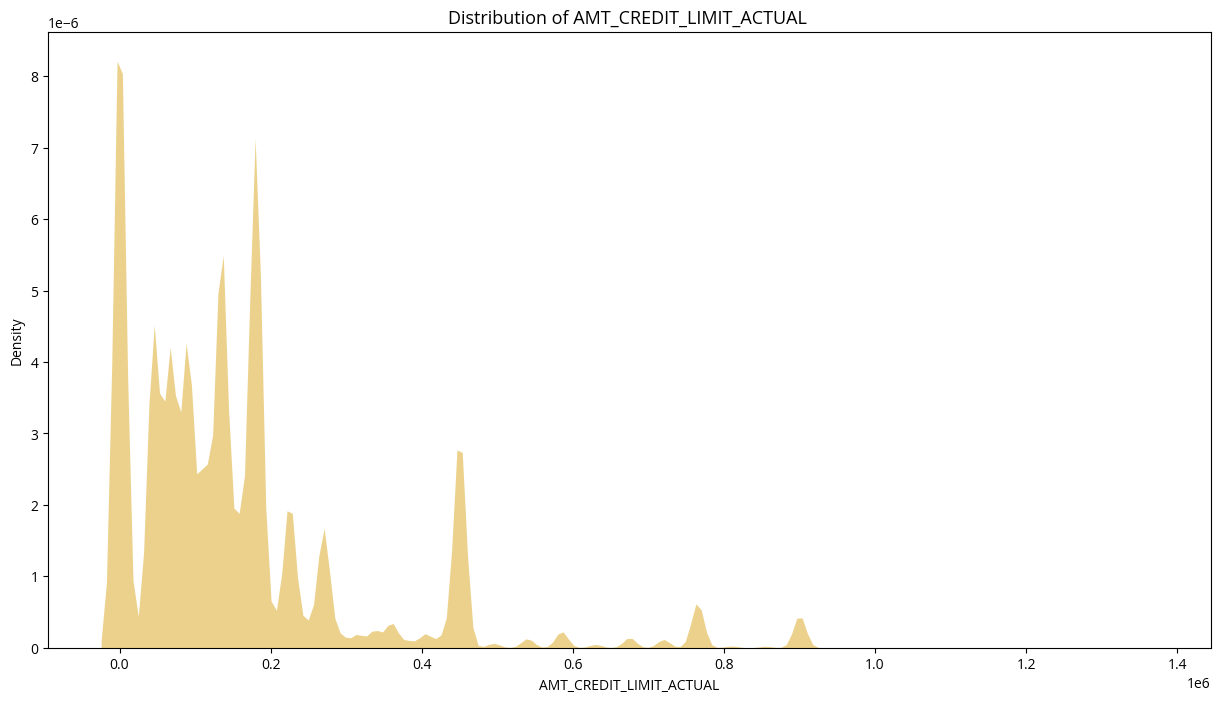

In [20]:
""" Plotting kde plot for AMT_CREDIT_LIMIT_ACTUAL """
helpers.calculate_statistics(df_cc, "AMT_CREDIT_LIMIT_ACTUAL")
helpers.plot_kde(df_cc, "AMT_CREDIT_LIMIT_ACTUAL")

### MONTHS_BALANCE and AMT_PAYMENT_TOTAL_CURRENT relationship

The scatter below plot shows the payment trends over different months. By plotting the "AMT_PAYMENT_TOTAL_CURRENT" against the "MONTHS_BALANCE" the payment amounts made by borrowers at different points in time can be observed.

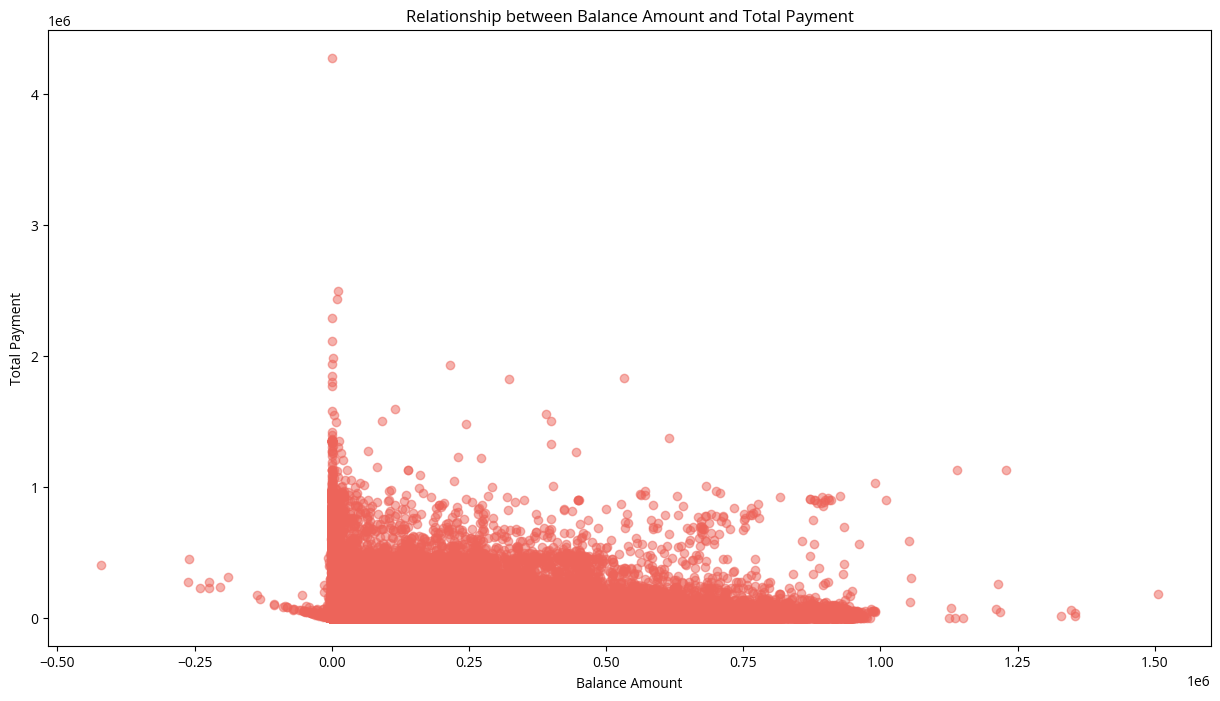

In [21]:
helpers.plot_scatter_for_two_cols(df_cc, "MONTHS_BALANCE", "AMT_PAYMENT_TOTAL_CURRENT")

In [22]:
""" Taking columns """
payment_columns = [
    "AMT_PAYMENT_CURRENT",
    "AMT_PAYMENT_TOTAL_CURRENT",
    "AMT_INST_MIN_REGULARITY",
]
grouped_status = df_cc.groupby("NAME_CONTRACT_STATUS")[payment_columns]
payment_stats = grouped_status.agg(["mean", "min", "max"])

The plot presents the average or total payment amounts (depending on how the data is aggregated) for each contract status category. Each contract status is represented by a bar, and the height of the bar indicates the average or total payment amount associated with that specific contract status.

The plot allows for easy comparison of payment amounts across different contract statuses. It provides a clear visual representation of how the payment amounts vary for each contract status category. For example, we can compare the payment amounts for active contracts, completed contracts, or other specific contract statuses.

'How much did the client pay during the month on the previous credit'

,mean,min,max
NAME_CONTRACT_STATUS,,,
Active,10657.706276,0.0,4289207.445
Approved,0.000000,0.0,0.000
Completed,170.094654,0.0,1419425.100
Demand,888.350870,0.0,185360.625
Refused,0.000000,0.0,0.000
Sent proposal,0.000000,0.0,0.000
Signed,7075.439016,0.0,769500.000


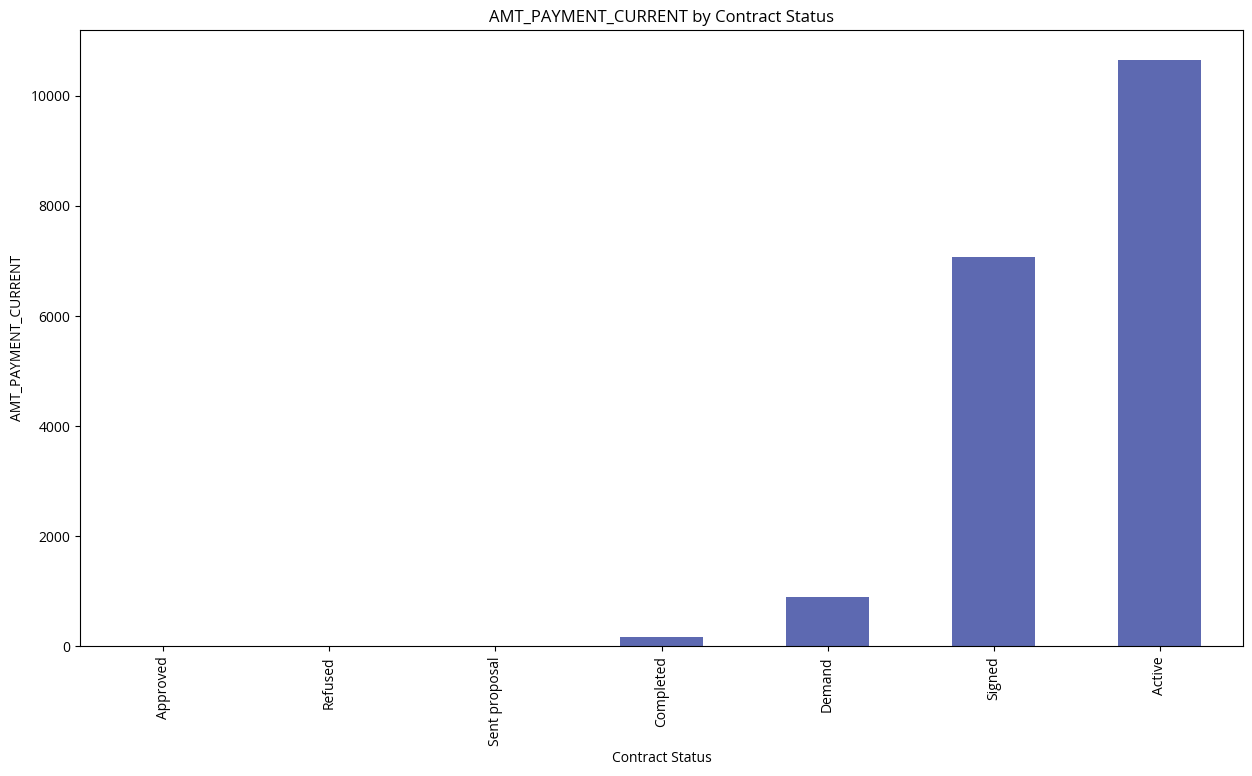

In [23]:
""" Plotting and displaying results of AMT_PAYMENT_CURRENT by contract status """
helpers.plot_grouped_by_col_data(payment_stats, "AMT_PAYMENT_CURRENT", descriptions)

'How much did the client pay during the month in total on the previous credit'

,mean,min,max
NAME_CONTRACT_STATUS,,,
Active,8409.950242,0.0,4278315.690
Approved,0.000000,0.0,0.000
Completed,138.905969,0.0,1417175.100
Demand,817.985407,0.0,185360.625
Refused,0.000000,0.0,0.000
Sent proposal,0.000000,0.0,0.000
Signed,5255.892468,0.0,769500.000


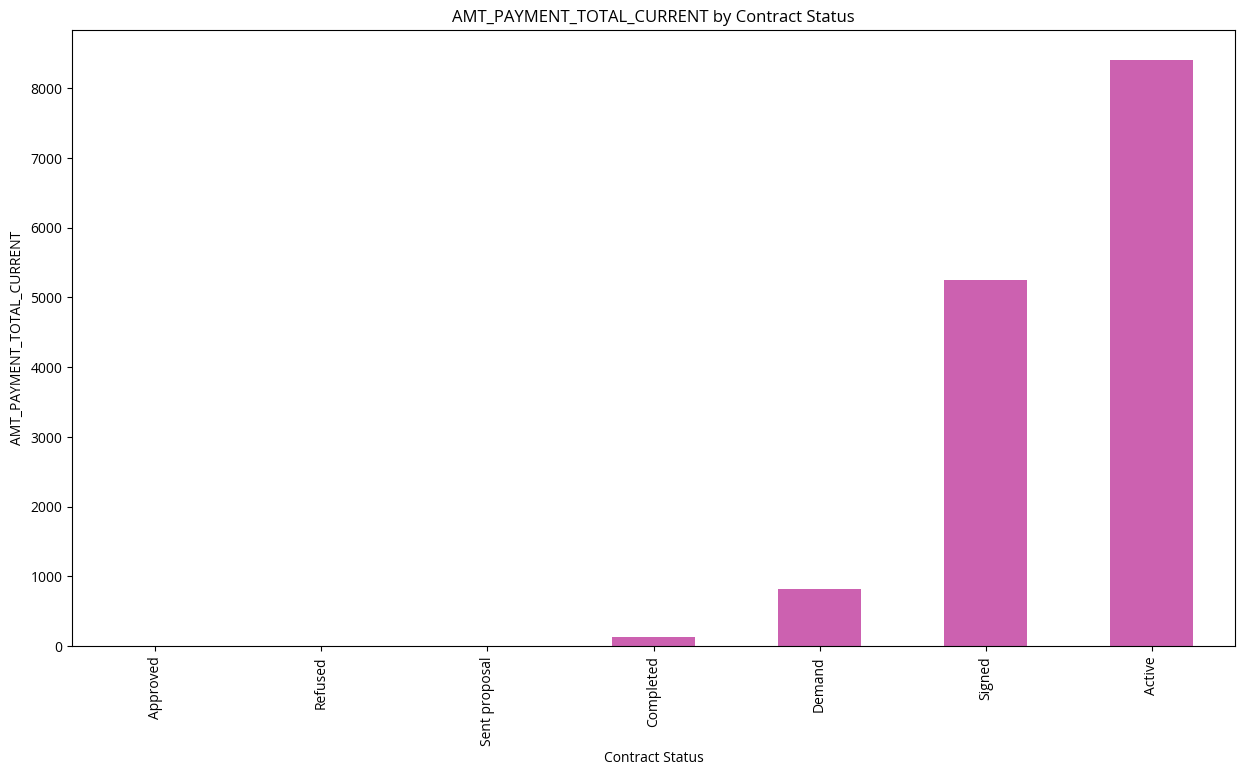

In [24]:
""" plotting and displaying results for AMT_PAYMENT_TOTAL_CURRENT and contract status"""
helpers.plot_grouped_by_col_data(
    payment_stats, "AMT_PAYMENT_TOTAL_CURRENT", descriptions
)

'Minimal installment for this month of the previous credit'

,mean,min,max
NAME_CONTRACT_STATUS,,,
Active,3611.649759,0.0,68929.965
Approved,0.000000,0.0,0.000
Completed,22.878229,0.0,46192.770
Demand,1470.079154,0.0,202882.005
Refused,0.000000,0.0,0.000
Sent proposal,0.000000,0.0,0.000
Signed,2516.874334,0.0,23450.355


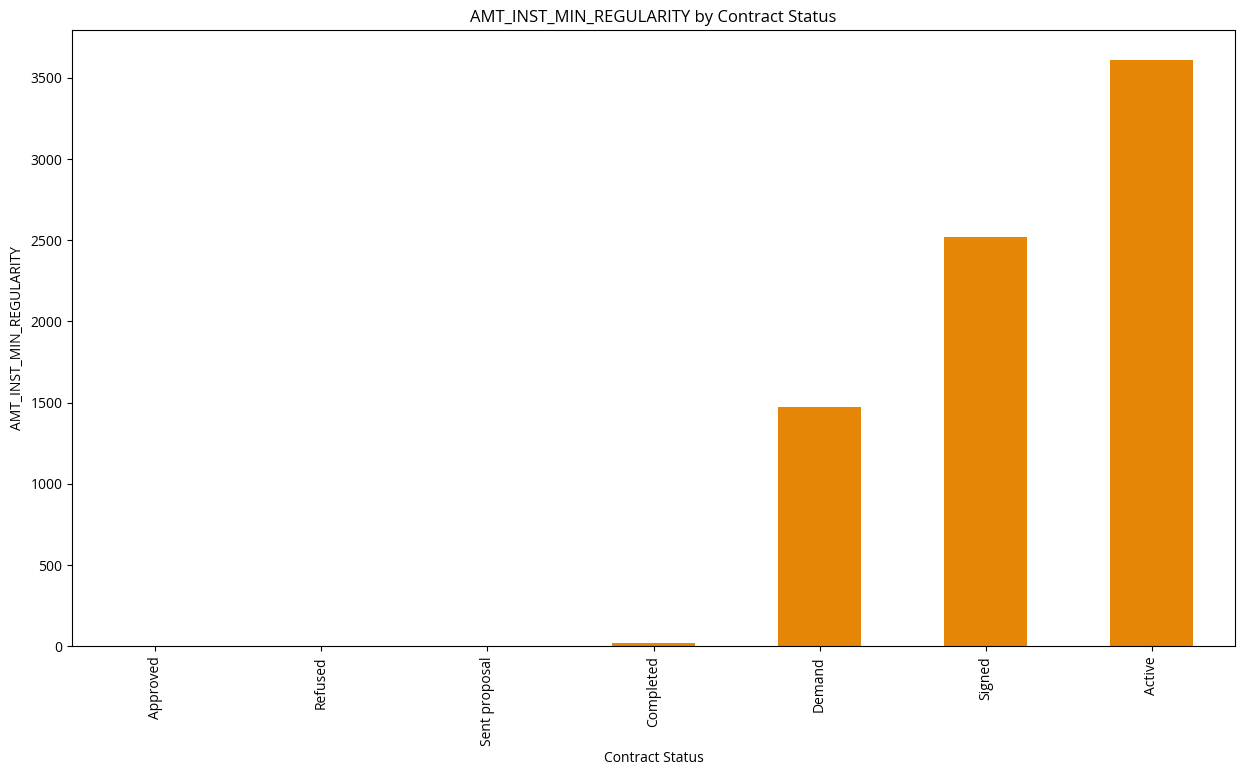

In [25]:
""" plotting and displaying results for AMT_INST_MIN_REGULARITY and contract status"""
helpers.plot_grouped_by_col_data(payment_stats, "AMT_INST_MIN_REGULARITY", descriptions)

NAME_CONTRACT_STATUS
Approved          0.000000
Refused           0.000000
Sent proposal     0.000614
Demand            0.652978
Completed         4.907700
Active            5.367771
Signed           30.601047
Name: UTILIZATION_RATE, dtype: float64

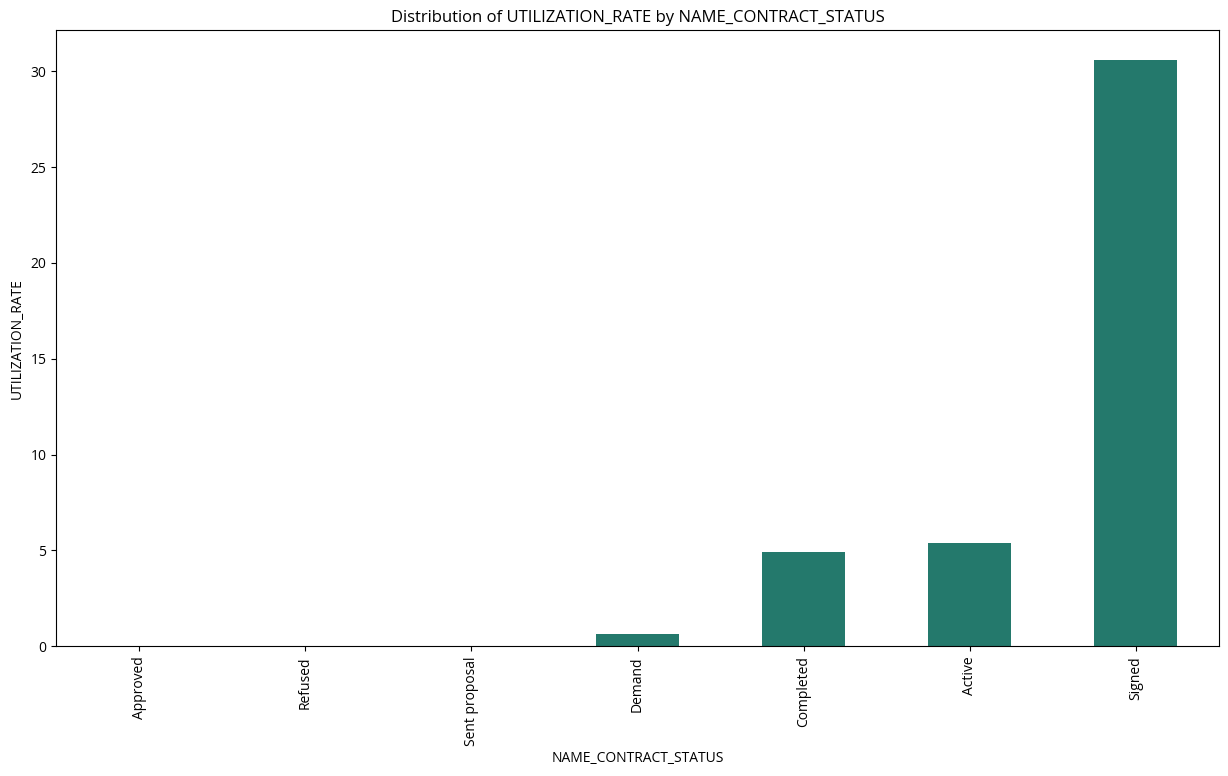

In [26]:
""" plotting and displaying results for UTILIZATION_RATE and NAME_CONTRACT_STATUS """
helpers.plot_dict_barplot(
    df_plot.groupby("NAME_CONTRACT_STATUS")["UTILIZATION_RATE"].mean().sort_values(),
    "NAME_CONTRACT_STATUS",
    "UTILIZATION_RATE",
    "Distribution of UTILIZATION_RATE by NAME_CONTRACT_STATUS",
)

In [27]:
""" Getting columns for the dataset """
(
    categorical_cols,
    categorical_numerical_cols,
    continuous_cols,
    binary_cols,
) = helpers.get_all_column_by_types(df_cc, utilization=True)

In [28]:
corr_df = df_plot.corr()

I also wanted to see what kind of other correlations we have in our dataset.

The top most positively correlated pairs indicate strong positive relationships between the variables:

AMT_RECIVABLE and AMT_TOTAL_RECEIVABLE: These two variables have a correlation coefficient of 0.999995, indicating an extremely strong positive correlation. Changes in one variable are almost perfectly linearly related to changes in the other variable.

AMT_BALANCE and AMT_RECIVABLE: The correlation coefficient between these variables is 0.999915, suggesting a very high positive correlation. Changes in one variable are highly likely to correspond to similar changes in the other variable.

AMT_BALANCE and AMT_TOTAL_RECEIVABLE: These variables have a correlation coefficient of 0.999895, indicating a very strong positive correlation. Changes in one variable are highly likely to be accompanied by similar changes in the other variable.

On the other hand, the top most negatively correlated pairs indicate the strongest negative relationships between the variables:

CNT_INSTALMENT_MATURE_CUM and CNT_DRAWINGS_CURRENT: These variables have a correlation coefficient of -0.103578, suggesting a weak negative correlation. Changes in one variable tend to be associated with small changes in the opposite direction in the other variable.

CNT_INSTALMENT_MATURE_CUM and AMT_DRAWINGS_CURRENT: The correlation coefficient between these variables is -0.109782, indicating a weak negative correlation. Changes in one variable tend to be accompanied by small changes in the opposite direction in the other variable.

CNT_INSTALMENT_MATURE_CUM and AMT_CREDIT_LIMIT_ACTUAL: These variables have a correlation coefficient of -0.157337, suggesting a relatively weak negative correlation. Changes in one variable are moderately likely to correspond to small changes in the opposite direction in the other variable.

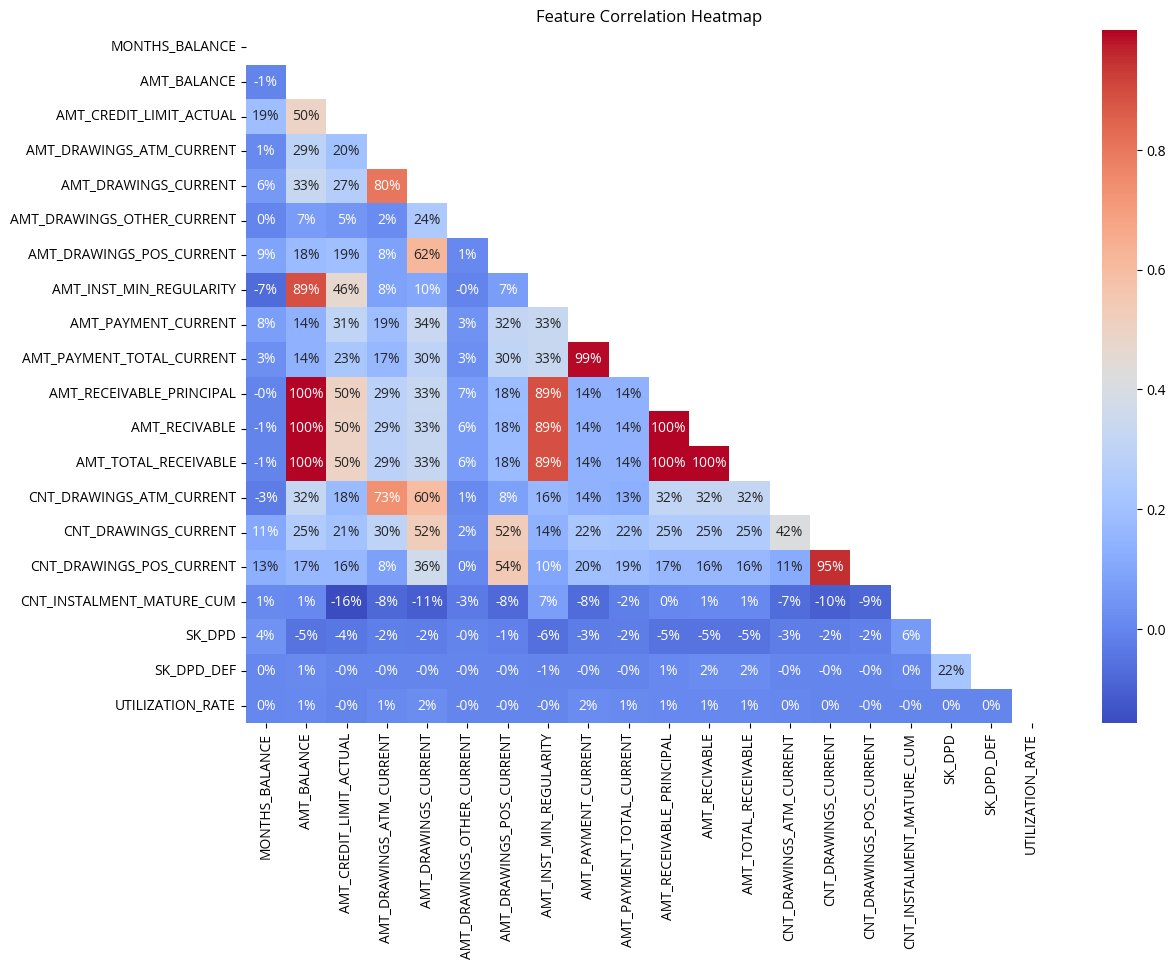

In [29]:
""" Plotting feature correlation map """
helpers.plot_feature_correlation_map(df_plot[continuous_cols])

In [30]:
""" Getting pipeline for anomaly prediction preprocessing """
pipeline = helpers.get_anomaly_detection_pipeline(
    continuous_cols,
    categorical_numerical_cols,
    categorical_cols,
    binary_cols,
    cols_impute_by_zero,
)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('zero_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['AMT_DRAWINGS_ATM_CURRENT',
                                                   'CNT_DRAWINGS_ATM_CURRENT',
                                                   'AMT_DRAWINGS_ATM_CURRENT',
                                                   'CNT_DRAWINGS_OTHER_CURRENT',
                                                   'AMT_DRAWINGS_POS_CURRENT',
                                                   'CNT_DRAWINGS_POS_CURRENT',
                                                   'AMT_IN...
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  []),
                                                 ('cat_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['CNT_DRAWINGS_OTHER_CURRENT']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['NAME_CONTRACT_STATUS'])])),
                ('isolation_forest', IsolationForest())])

The model creates two new features, "is_fraud" which will be 1 if the transaction seems to be fraudulent and 0 if not. Also, from IsolationForest decision_function a new feature "anomaly_score" will be set. 

The more negative the anomaly_score is the more fraudulent the transaction is.

In [31]:
""" Fitting and predicting the anomaly scores """
pipeline.fit(df_cc)
anomaly_scores = pipeline.decision_function(df_cc)
predictions = pipeline.predict(df_cc)

In [32]:
""" Setting Anomaly Scores and Is Fraud values """
df_cc["anomaly_score"] = anomaly_scores
df_cc["is_fraud"] = predictions
df_cc["is_fraud"] = df_cc["is_fraud"].map(
    lambda x: 1 if x == -1 else 0 if x == 1 else x
)

The analysis of the "anomaly_score" column in the dataset reveals the following insights:

* Mean: The average anomaly score in the "anomaly_score" column is approximately 0.115269. This value represents the average level of anomaly or deviation from the norm across the dataset. A higher mean score suggests a higher overall level of anomalies.

* Median: The median anomaly score for this column is 0.141429. It indicates that half of the entries in the dataset have an anomaly score equal to or below this value. The median is useful for understanding the central tendency of the anomaly scores and can provide insights into the overall distribution.

* Maximum: The highest anomaly score in the "anomaly_score" column is 0.178089. This value represents the maximum level of deviation or abnormality observed in the dataset. Anomalies with scores closer to the maximum value indicate a higher degree of deviation from the norm.

* Quantiles: The quantiles provide additional information about the distribution of anomaly scores:

    * 25% quantile: The value at the 25th percentile is 0.094550. This means that 25% of the anomaly scores in the dataset are equal to or below this value. Lower values at the 25th percentile indicate a relatively lower level of anomalies.

    * 50% quantile: The value at the 50th percentile (median) is 0.141429. It represents the midpoint of the anomaly scores distribution, with 50% of the scores falling at or below this value.

    * 75% quantile: The value at the 75th percentile is 0.159766. This means that 75% of the anomaly scores in the dataset are equal to or below this value. A higher value at the 75th percentile suggests a relatively higher level of anomalies.

Mean: 0.113783
Median: 0.137989
Maximum: 0.175014
Quantiles:
  25% quantile: 0.092433
  50% quantile: 0.137989
  75% quantile: 0.155206


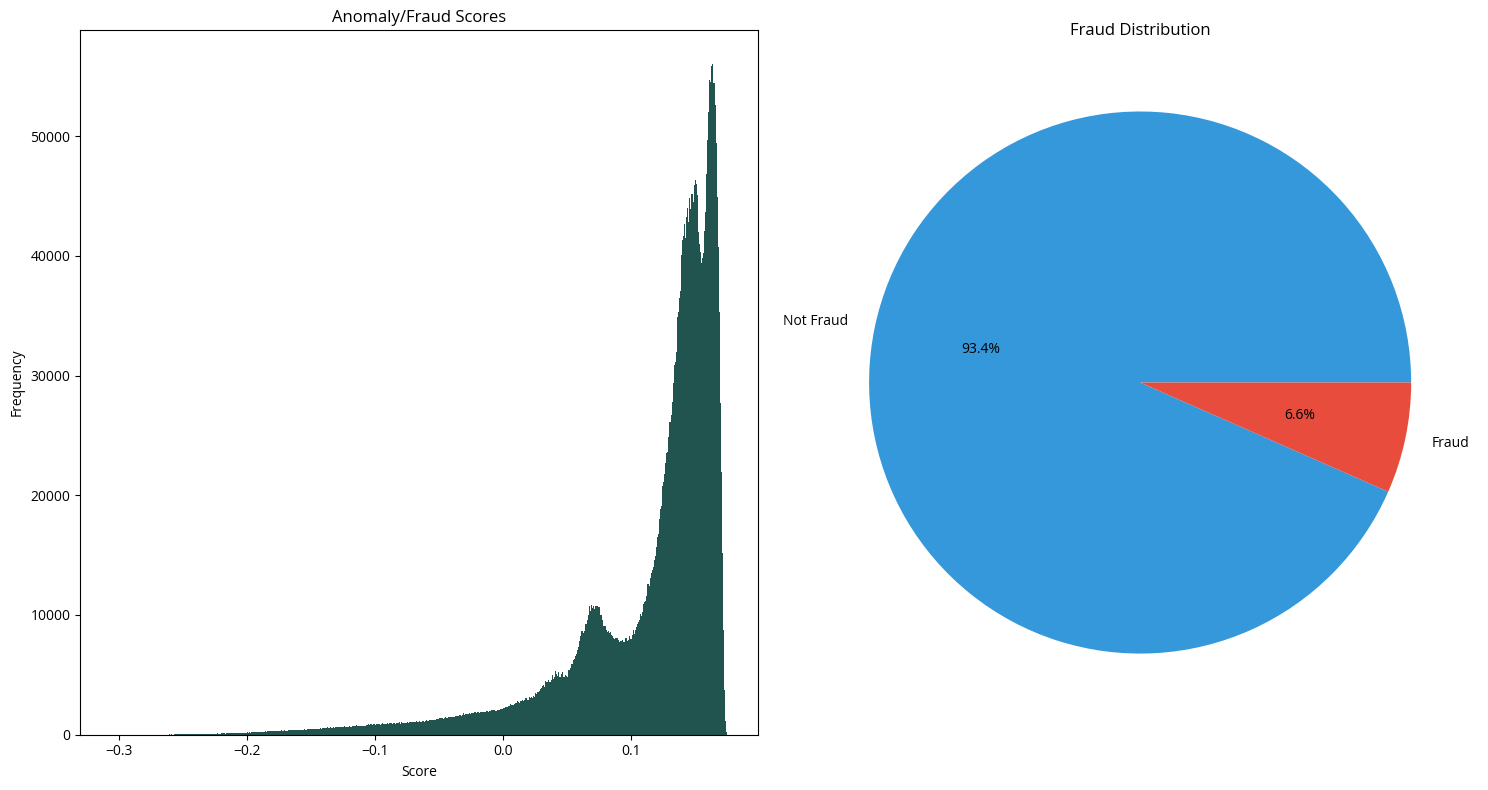

In [33]:
""" Plotting the results we got from predicting anomaly scores """
helpers.calculate_statistics(df_cc, "anomaly_score")
helpers.plot_anomaly_scores(df_cc)

Balance during the month of previous credit and fraud_scores relationship


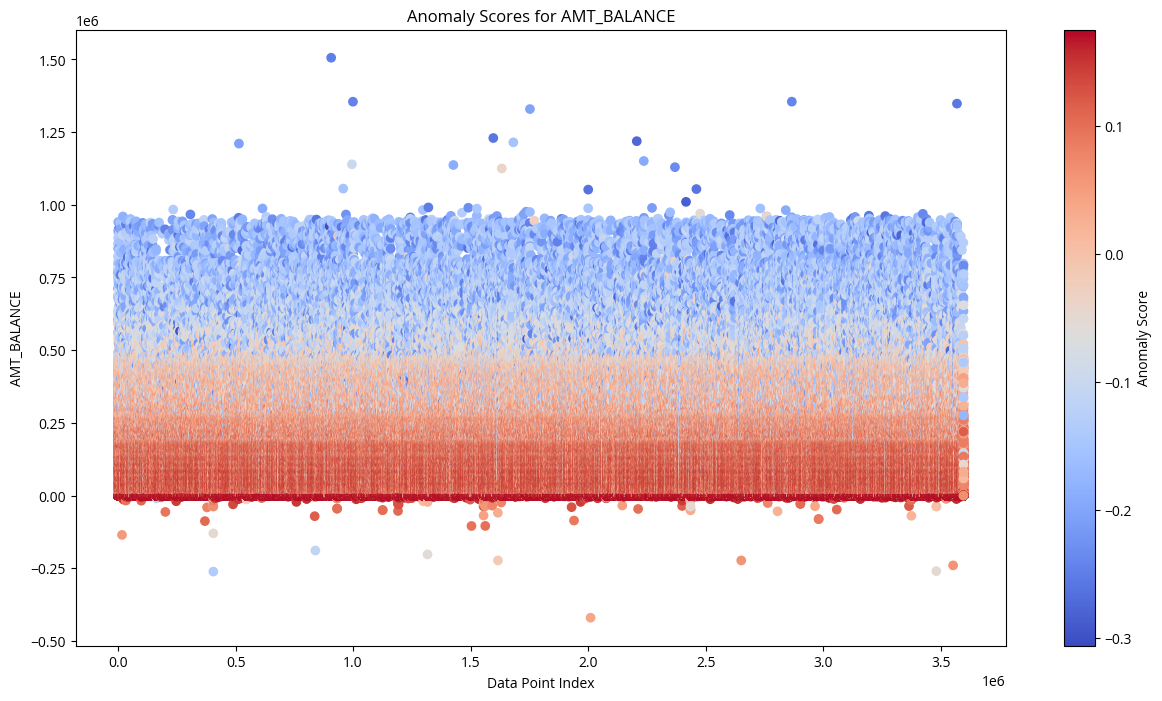

In [34]:
""" Plotting the anomaly_score by AMT_BALANCE """
helpers.plot_anomaly_fraud_scores_with_col(
    df_cc, "AMT_BALANCE", descriptions, fraud_col="anomaly_score"
)

Amount drawing at ATM during the month of the previous credit and fraud_scores relationship


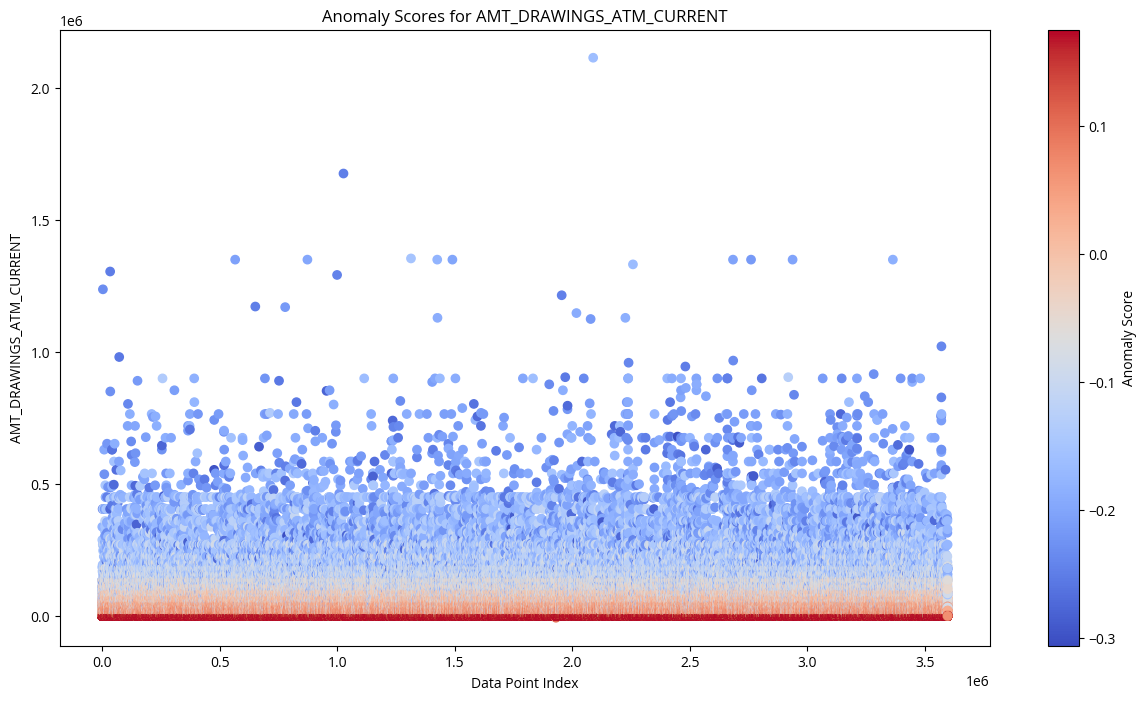

In [35]:
""" Plotting the anomaly_score by AMT_DRAWINGS_ATM_CURRENT """
helpers.plot_anomaly_fraud_scores_with_col(
    df_cc, "AMT_DRAWINGS_ATM_CURRENT", descriptions, fraud_col="anomaly_score"
)

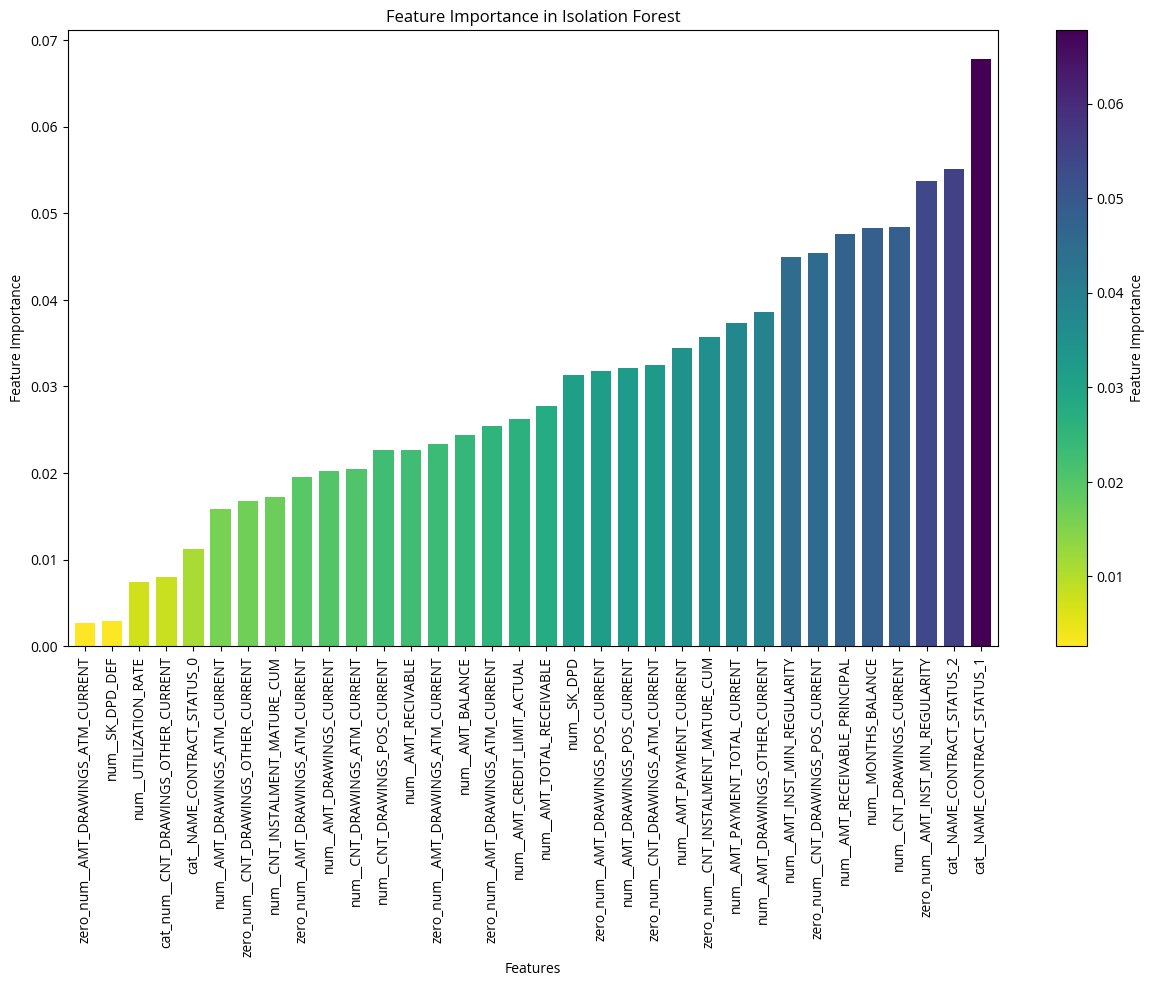

In [36]:
""" Plotting IsolationForest feature importances """ 
df_transformed = pipeline.named_steps["preprocessor"].transform(df_cc)
helpers.plot_isolation_forest_feature_importance(
    df_transformed[[col for col in df_transformed if "_ID_" not in col]], pipeline
)

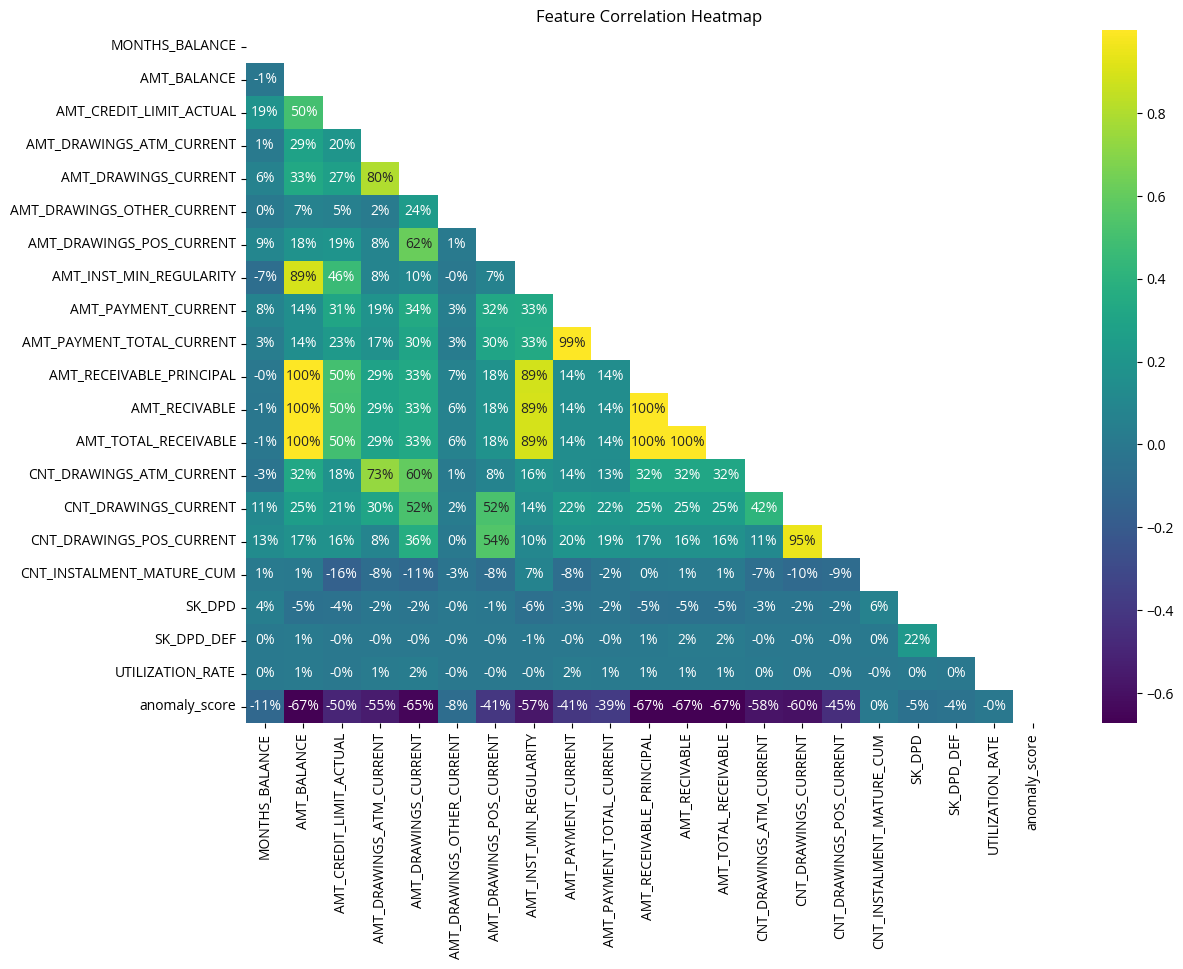

In [37]:
""" Plotting feature correlation map with anomaly score """
_, _, pred_continuous_cols, _ = helpers.get_all_column_by_types(df_cc)
helpers.plot_feature_correlation_map(df_cc[pred_continuous_cols], cmap="viridis")

**The top 10 features and their importance in predicting the "is_fraud" column**

* anomaly_score: This feature has the highest mutual information score, indicating that it has a strong relationship with the "is_fraud" column. The higher the anomaly score, the more likely the transaction is classified as fraudulent.

* AMT_DRAWINGS_CURRENT: This feature has a relatively high mutual information score, suggesting that it is informative in predicting fraud. It represents the total amount of drawings done by the customer at the time of the transaction.

* CNT_DRAWINGS_CURRENT: This feature also has a notable mutual information score, indicating its relevance to fraud prediction. It represents the number of drawings done by the customer at the time of the transaction.

* AMT_BALANCE: This feature has a moderate mutual information score, suggesting its partial importance in fraud detection. It represents the current balance amount of the customer.

* AMT_RECEIVABLE_PRINCIPAL: This feature has a significant mutual information score, indicating its relevance to fraud prediction. It represents the principal amount that the customer is yet to receive.

* AMT_RECIVABLE: This feature has a relatively high mutual information score, suggesting its importance in predicting fraud. It represents the total amount receivable by the customer.

* AMT_TOTAL_RECEIVABLE: This feature also has a relatively high mutual information score, indicating its relevance to fraud prediction. It represents the total receivable amount by the customer, including both principal and interest.

* AMT_DRAWINGS_ATM_CURRENT: This feature has a notable mutual information score, suggesting its importance in fraud detection. It represents the amount of drawings done at an ATM by the customer at the time of the transaction.

* AMT_CREDIT_LIMIT_ACTUAL: This feature has a relatively moderate mutual information score, indicating its partial importance in predicting fraud. It represents the actual credit limit of the customer.

* AMT_INST_MIN_REGULARITY: This feature has a relatively moderate mutual information score, suggesting its partial relevance to fraud prediction. It represents the minimum installment amount for the customer.

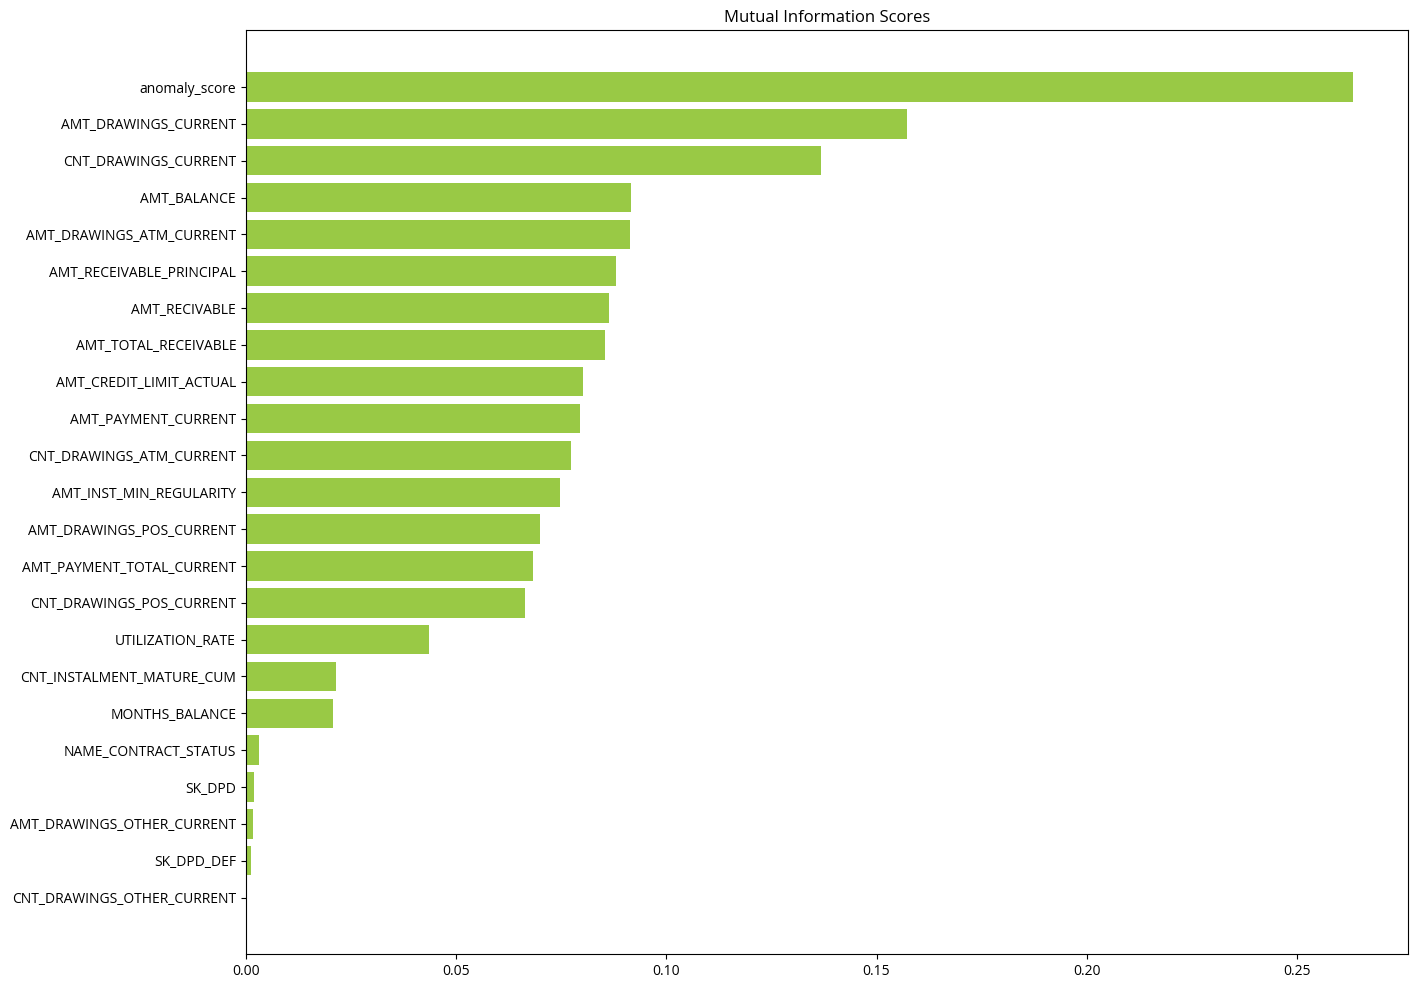

anomaly_score               0.263320
AMT_DRAWINGS_CURRENT        0.157158
CNT_DRAWINGS_CURRENT        0.136806
AMT_BALANCE                 0.091654
AMT_DRAWINGS_ATM_CURRENT    0.091400
AMT_RECEIVABLE_PRINCIPAL    0.088071
AMT_RECIVABLE               0.086304
AMT_TOTAL_RECEIVABLE        0.085403
AMT_CREDIT_LIMIT_ACTUAL     0.080176
AMT_PAYMENT_CURRENT         0.079507
Name: MI Scores, dtype: float64

In [42]:
""" Plotting mutual information with new is_fraud label """
df = df_cc.sample(100000, random_state=42).copy()
mi_scores = helpers.get_and_plot_mi_scores(
    df[[col for col in df.columns if col != "is_fraud" and "_ID_" not in col]],
    df[["is_fraud"]],
    "is_fraud",
)
mi_scores[:10]

In [38]:
""" Deploy the fraud_score_detector model """
with open("fraud_score_detector.pkl", "wb") as file:
    pickle.dump(pipeline, file)

## Deployed Application

#### Frontend Created with Streamlit: https://frontend-service-kx4s6cgoga-ew.a.run.app/
#### Backend Created with FastAPI: https://backend-service-kx4s6cgoga-lm.a.run.app/